In [30]:
#import libraries
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#dùng để xoay góc ảnh
from PIL import Image
import pandas as pd
import os

In [31]:
# Đọc file CSV phân biệt tay
data = pd.read_csv('TayTraiPhai2_1.3_PhanQuangHuy_21SE2_tayall.csv')

# Đọc file CSV chứa thông tin góc xoay
angle_data = pd.read_csv('GocXoay_1.3_PhanQuangHuy_21SE2_tayall.csv')

In [32]:
#đọc dữ liệu file phân loại tay
data.head()

,Stt,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
0,No. 1,train1,1377,NaN
1,No. 2,train1,1378,NaN
2,No. 3,train1,1379,NaN
3,No. 4,train1,1380,NaN
4,No. 5,train1,1381,NaN


In [33]:
filt = ((data['Tay T (trai)/P (phai)/2 (ca 2 tay)']=='P')) #filter DataFrame
data[filt]

,Stt,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
1086,No. 1087,train1,2584,P
1156,No. 1157,train1,2660,P
1164,No. 1165,train1,2668,P
1165,No. 1166,train1,2669,P
1176,No. 1177,train1,2682,P
1182,No. 1183,train1,2689,P
1215,No. 1216,train1,2724,P
1222,No. 1223,train1,2731,P
1227,No. 1228,train1,2736,P
1247,No. 1248,train1,2757,P


In [34]:
filt2 = ((data['Tay T (trai)/P (phai)/2 (ca 2 tay)']=='T')) #filter DataFrame
data[filt2]

,Stt,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)
1000,No. 1001,train1,2491,T
1001,No. 1002,train1,2492,T
1002,No. 1003,train1,2493,T
1003,No. 1004,train1,2494,T
1004,No. 1005,train1,2495,T
...,...,...,...,...
1495,No. 1496,train1,3039,T
1496,No. 1497,train1,3040,T
1497,No. 1498,train1,3041,T
1498,No. 1499,train1,3042,T


In [35]:
filt3 = ((data['Tay T (trai)/P (phai)/2 (ca 2 tay)']==2)) #filter DataFrame
data[filt3]

,Stt,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay)


In [36]:
# đọc dữ liệu file góc xoay của tay
angle_data.head()

,Stt,Folder,ID,Tay T (trai)/P (phai)/2 (ca 2 tay),Goc xoay (bao nhieu do) file giu nguyen goc xay la 0 -khong thuc hien voi anh 2 ban tay
0,No. 1,train1,1377,NaN,NaN
1,No. 2,train1,1378,NaN,NaN
2,No. 3,train1,1379,NaN,NaN
3,No. 4,train1,1380,NaN,NaN
4,No. 5,train1,1381,NaN,NaN


In [37]:
# Thư mục chứa ảnh gốc và thư mục chứa ảnh sau khi xoay
image_folder = 'train1-dataset-image'
output_folder = 'train1'

In [38]:
# # Hàm kiểm tra xem một giá trị có thể chuyển thành số nguyên hay không
# def is_valid_integer(value):
#     try:
#         int(value)
#         return True
#     except (ValueError, TypeError):
#         return False

# # Lặp qua từng dòng trong dữ liệu
# for index, row in angle_data.iterrows():
#     # Kiểm tra nếu hình ảnh thuộc vào thư mục train1
#     if row['Folder'] == 'train1':
#         image_path = f"{image_folder}/{row['ID']}.png"
#         output_path = f"{output_folder}/{row['ID']}.png"

        
#         # Đọc ảnh
#         img = Image.open(image_path)
        
#         # Kiểm tra nếu góc xoay có giá trị hợp lệ
#         angle_value = row['Goc xoay (bao nhieu do) file giu nguyen goc xay la 0 -khong thuc hien voi anh 2 ban tay']
#         if is_valid_integer(angle_value):  # Kiểm tra xem giá trị có thể chuyển thành số nguyên không
#             angle = int(angle_value)
#             rotate_img = img.rotate(angle, expand=True)
            
#             # Tạo thư mục output nếu chưa tồn tại
#             os.makedirs(output_folder, exist_ok=True)
#             # Lưu ảnh sau khi xoay vào thư mục mới
#             rotate_img.save(output_path)

#             print(f"Đã xoay và lưu ảnh {row['ID']} vào {output_path}")
#         else:
#             print(f"Không thể xoay ảnh {row['ID']} vì giá trị góc xoay không hợp lệ: {angle_value}")


In [39]:
# Chuẩn bị danh sách ảnh và nhãn
images = []
labels = []

In [40]:
# Lặp qua từng dòng trong dữ liệu
for index, row in data.iterrows():
    # Kiểm tra nếu hình ảnh thuộc vào thư mục train1
    if row['Folder'] == 'train1':
        image_path = f"{output_folder}/{row['ID']}.png"
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:  # Kiểm tra xem hình ảnh có được đọc thành công không
            image = cv2.resize(image, (64,64))  # Chuẩn hóa kích thước hình ảnh về 64x64
            images.append(image)
            labels.append(row['Tay T (trai)/P (phai)/2 (ca 2 tay)'])

In [41]:
# Chuyển đổi danh sách hình ảnh và nhãn thành mảng numpy
X = np.array(images)
y = np.array(labels)

In [42]:
# Chuyển đổi nhãn thành số nguyên
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

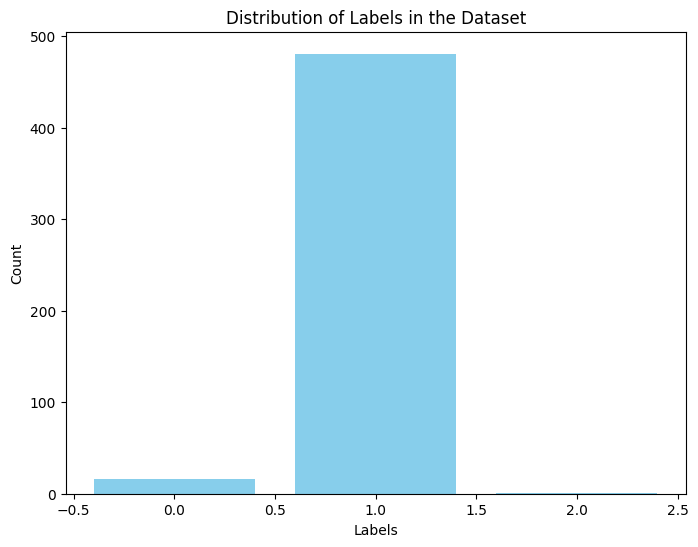

In [43]:
# Hiển thị phân phối của các nhãn trong tập dữ liệu
unique_labels, label_counts = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, label_counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.show()

In [44]:
# Chuyển đổi mảng hình ảnh thành dạng mà SVM có thể xử lý
X = X.reshape(X.shape[0], -1)  # Chuyển đổi mỗi ảnh thành một vector

In [45]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Hiển thị phân phối của các nhãn trong tập huấn luyện và tập kiểm tra
unique_train_labels, train_label_counts = np.unique(y_train, return_counts=True)
unique_test_labels, test_label_counts = np.unique(y_test, return_counts=True)


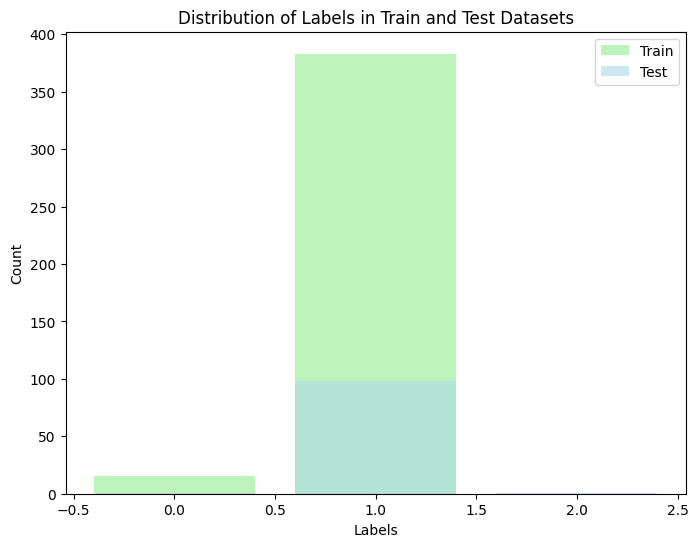

In [47]:
plt.figure(figsize=(8, 6))
plt.bar(unique_train_labels, train_label_counts, color='lightgreen', alpha=0.6, label='Train')
plt.bar(unique_test_labels, test_label_counts, color='lightblue', alpha=0.6, label='Test')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in Train and Test Datasets')
plt.legend()
plt.show()

In [48]:
# Đào tạo mô hình SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [50]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.00%


In [51]:
# Lưu mô hình đã đào tạo
joblib.dump(model, 'svm_hand_pre_model.pkl')

['svm_hand_pre_model.pkl']

In [52]:
# Hiển thị số lượng dữ liệu ảnh và ID ảnh bị dự đoán sai trong mô hình
misclassified_images = []
for true_label, predicted_label, index in zip(y_test, y_pred, range(len(y_test))):
    image_id = data.iloc[index]['ID']
    if true_label != predicted_label:
        misclassified_images.append(image_id)

print("Số lượng dữ liệu ảnh bị dự đoán sai trong mô hình:", len(misclassified_images))
print("ID ảnh bị dự đoán sai trong mô hình:", misclassified_images)


Số lượng dữ liệu ảnh bị dự đoán sai trong mô hình: 1
ID ảnh bị dự đoán sai trong mô hình: [1394]


In [53]:
# Hiển thị báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=np.arange(len(label_encoder.classes_)), target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           P       0.50      1.00      0.67         1
           T       1.00      1.00      1.00        98
           p       0.00      0.00      0.00         1

    accuracy                           0.99       100
   macro avg       0.50      0.67      0.56       100
weighted avg       0.98      0.99      0.99       100



c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

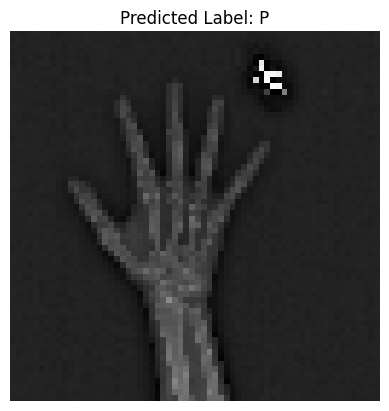

In [54]:
#đọc ảnh được đào tạo trong thư mục
import matplotlib.pyplot as plt

# Đọc ảnh bất kỳ từ thư mục train1
random_image_path = 'train1/2757.png'  # Đường dẫn đến ảnh bất kỳ trong thư mục train1
random_image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
random_image = cv2.resize(random_image, (64,64))  # Chuẩn hóa kích thước hình ảnh về 64x64

# Dự đoán loại của hình ảnh bằng mô hình đã đào tạo
predicted_label = model.predict(random_image.reshape(1, -1))
predicted_label = label_encoder.inverse_transform(predicted_label)[0]  # Chuyển đổi nhãn ngược lại thành chuỗi

# Hiển thị hình ảnh và nhãn tương ứng
plt.imshow(random_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


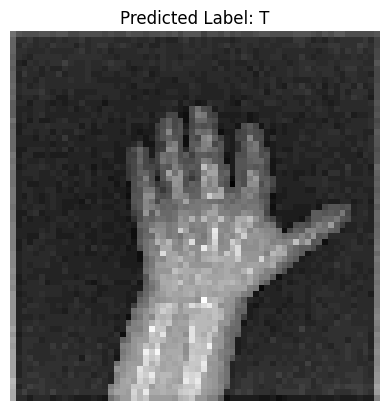

In [55]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import joblib
import matplotlib.pyplot as plt

# Load mô hình đã đào tạo
model = joblib.load('svm_hand_pre_model.pkl')

# Đường dẫn đến hình ảnh muốn dự đoán
image_path_to_predict = 'train1/2491.png'

# Đọc hình ảnh và chuẩn bị dữ liệu
image = cv2.imread(image_path_to_predict, cv2.IMREAD_GRAYSCALE)
if image is not None:
    image = cv2.resize(image, (64,64))  # Chuẩn hóa kích thước hình ảnh về 64x64
    image_flattened = image.reshape(1, -1)  # Chuyển đổi hình ảnh thành một vector
    # Dự đoán nhãn cho hình ảnh
    predicted_label = model.predict(image_flattened)
    # Chuyển đổi nhãn dự đoán thành tên nhãn ban đầu
    label_encoder = LabelEncoder()
    label_encoder.fit(['T','P'])  # T: tay trái, P: tay phải, 2: cả hai tay
    predicted_label_name = label_encoder.inverse_transform(predicted_label)
    
    # Hiển thị hình ảnh và kết quả dự đoán
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label_name[0]}")
    plt.axis('off')
    plt.show()
else:
    print("Failed to read the image.")
